# Guided Project: Finding the Best Markets to Advertise In
## Introduction

n this project, we will aim to find the two best markets to advertise our product in - we are working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we would like to invest some money in advertisement. 

## The goal of the project:
- find out the two best markets to advertise our product in.

## Methodology
This analysis will use descriptive statistics and data visualizations (e.g. scatter plots, pie charts) to explore the data from <a href='https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/'>freeCodeCamp's 2017 New Coder Survey</a>. <a href='https://www.freecodecamp.org/'> freeCodeCamp</a> is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this <a href='https://github.com/freeCodeCamp/2017-new-coder-survey'>GitHub repository</a>.

## Asumptions
- our product is the montly subscription for the courses on Web Development or Mobile Developments;
- the cost of the montly subscription is $59.

## Findings
The main findings are:

- the US market has the most promissing investment opportunities for the advertisement of our product;
- Indian and Canadian markets seem to be equally good for promoting our product, however, more profound research and detailed data are needed.

## Data exploration

In [1]:
import pandas as pd
import numpy

# enable visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 137)

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/Users/ruslankononov/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Data analysis
Since we deal with a data set that had been cleaned for us, we can directly take to the data analysis. As we want to answer questions about a population of new coders that are interested in the subjects our IT school teaches, we would like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

### Respondents by their interests

Nevertheless, before starting to analyze the sample data we have, we need to clarify whether it іs representative for our population of interest and it has the right categories of people for our purpose. Since the focus of our courses is on __web__ and __mobile development__, answering the following questions will help us understand if the data set is relevant for our analysis:

- Are people interested in only one subject or they can be interested in more than one subject?
- How many people are interested in Web / Mobile Development ?

In [5]:
# drop rows where respondents did not indicate their job interest
survey = survey.dropna(subset=['JobRoleInterest'])

role_dist = survey['JobRoleInterest'].value_counts(normalize=True)*100
role_dist

Full-Stack Web Developer                                                                                          11.770595
  Front-End Web Developer                                                                                          6.435927
  Data Scientist                                                                                                   2.173913
Back-End Web Developer                                                                                             2.030892
  Mobile Developer                                                                                                 1.673341
                                                                                                                    ...    
Data Engineer, Information Security,   Product Manager,   Data Scientist,   DevOps / SysAdmin, security expert     0.014302
Game Developer, Back-End Web Developer,   Front-End Web Developer,   Mobile Developer                              0.014302
  Produc

In [6]:
# rename column names
role_dist = role_dist.reset_index()
role_dist.rename(columns = {'index':'field','JobRoleInterest':'share'}, inplace = True)

In [7]:
# create a column with a Boolean value showing if a respondent is interested in more that one subject
role_dist['has_multiple_interests'] = role_dist.iloc[:,0].str.contains(',')

In [8]:
# group respondent's answer by the 'has_multiple_interests' column
multiple_options = role_dist.groupby('has_multiple_interests').agg(numpy.sum)

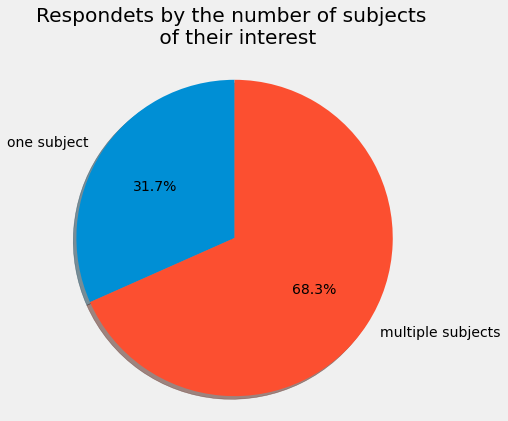

In [9]:
# visualize findings
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(multiple_options.share, labels=['one subject','multiple subjects'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Respondets by the number of subjects \n of their interest", y = 1.04)

plt.show()

The graph clearly depicts that __the majority of the respondents are interested in more than one subject__.
Let's find out what share of the responders can be our target group. In other words, we need to know __how many people are interested in Web or Mobile Development__?

In [10]:
# create a column with a Boolean value showing if a respondent belongs to a target group
role_dist['is_target_group'] = role_dist['field'].apply(lambda x:True if ('Web Developer' in x or 'Mobile' in x) else False)

In [11]:
web_mobile = role_dist.groupby('is_target_group').agg(numpy.sum)

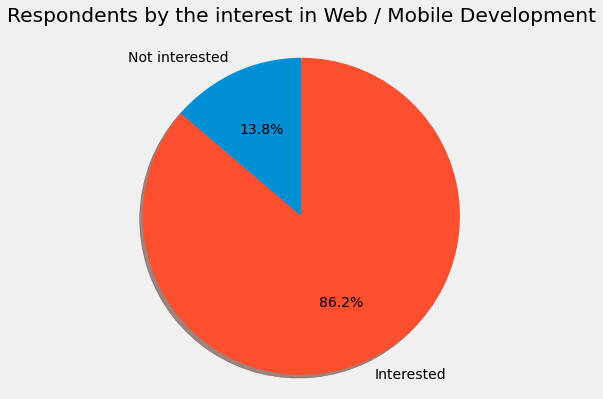

In [12]:
# visualize findings
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(web_mobile.share, labels=['Not interested','Interested'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Respondents by the interest in Web / Mobile Development", y = 1.04)

plt.show()

If we look at the graph above, we can see that __the overwhelming majority of the respondents expressed interest in the subjects related to Web and Mobile Development__.

### Respondents by their country of residence
Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The __CountryCitizen__ variable describes the country of origin for each participant, and the __CountryLive__ variable describes what country each participants lives in (which may be different than the origin country). For our analysis, __we will work with the CountryLive variable because we are interested where people actually live at the moment when we run the ads__. In other words, we are interested where people are located, not where they were born.

Because the data set provides information at a country level, __we will think of each country as an individual market__. This means __we can frame our goal as finding the two best countries to advertise in__.

__One indicator of a good market is the number of potential customers__ — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [13]:
# generate absolute frequencies
survey['CountryLive'].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [14]:
# generate relative frequencies
survey['CountryLive'].value_counts(normalize=True).head(10)*100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

In [15]:
# remove rows with null values in 'CountryLive' column
survey = survey.dropna(subset=['CountryLive'])

As we see, __the biggest market for us to advertise in is the American one__. The american respondents of this survey make up roughly 46% of all the potential clients of our courses. The second and the third market in terms of its size is Indian and British respectively. The last in the top 4 is the market of Canadian coders.

However, we need to go more in depth with our analysis before taking a decision. __We can continue by figuring out how much money new coders are actually willing to spend on learning__. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. 

It also seems like a good idea __to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:__

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

### Respondents by their willingness to pay for learning

The __MoneyForLearning__ column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason __we are interested in finding out how much money each student spends per month__.

To achieve that, we will create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey). We will divide the __MoneyForLearning__ column to the __MonthsProgramming__ column. Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, we will replace all the values of 0 with 1.

In [16]:
def get_target_countries(x):
    if x in ['United States of America','United Kingdom','India','Canada']:
        return True
    else:
        return False

is_target_country =  survey['CountryLive'].apply(get_target_countries)

target_group = survey[is_target_country].copy()

In [17]:
# replace all the values of 0 with 1 to avoid dividing by 0
target_group['MonthsProgramming'] = target_group['MonthsProgramming'].apply(lambda x:1 if x==0 else x)

In [18]:
# calculate the amount of money a student has spent per month and save this value in a new column
target_group['MonthlyPay'] = target_group['MoneyForLearning'] / target_group['MonthsProgramming']

In [19]:
target_group['MonthlyPay'].value_counts(dropna=False)

0.000000       1844
NaN             313
16.666667        82
50.000000        76
25.000000        74
               ... 
1.052632          1
4.857143          1
1670.000000       1
0.672043          1
611.111111        1
Name: MonthlyPay, Length: 388, dtype: int64

In [20]:
# drop the rows that have a null value in the column 'MonthlyPay'.
target_group = target_group.dropna(subset=['MonthlyPay'])

# display mean value for monthly expenses on learning 
avg_exp_per_country = target_group.groupby('CountryLive').agg(numpy.mean)['MonthlyPay']
avg_exp_per_country

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MonthlyPay, dtype: float64

As we see, __the results for the United Kingdom and Canada are surprisingly low__ relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we would intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we do __not__ have have enough __representative data__ for the United Kingdom, Canada, and India, __or__ we have __some outliers__ making the mean too big for India, or too low for the UK and Canada. 

Text(0.5, 1.04, 'Monthly expenses on learning by country')

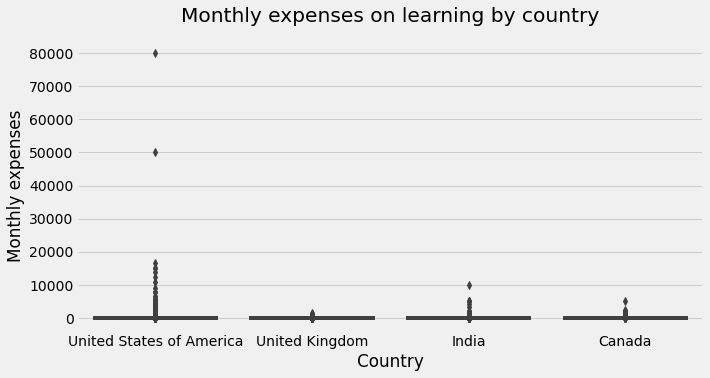

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x = 'CountryLive', y = 'MonthlyPay', data = target_group)
plt.ylabel('Monthly expenses')
plt.xlabel('Country')
plt.title("Monthly expenses on learning by country", y = 1.04)

It is hard to see on the plot above if there is anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there is something really off for the US: two persons spend each month USD 50,000 or more for learning. This seems hardly possible and extremely unlikely, so __we will remove every value that goes over USD 20,000 per month__.

Text(0.5, 1.04, 'Monthly expenses on learning by country')

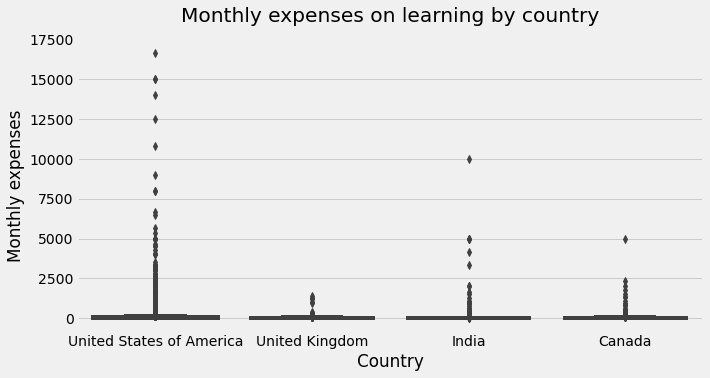

In [22]:
target_group = target_group[target_group['MonthlyPay']<=20000]

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x = 'CountryLive', y = 'MonthlyPay', data = target_group)
plt.ylabel('Monthly expenses')
plt.xlabel('Country')
plt.title("Monthly expenses on learning by country", y = 1.04)

We can see __a few extreme outliers for India__ (values over USD 2500 per month), but it is unclear whether this data is reliable. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find out more about the reasons for such extreme values.

In [23]:
# examine the extreme outliers for India
india_outliers = target_group[
    (target_group['CountryLive'] == 'India') & 
    (target_group['MonthlyPay'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyPay
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN

We can see that __neither participant attended a bootcamp__. Overall, it is really hard to figure out from the data whether these respondents really spent that much money on learning. The actual question of the survey was "*Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?*", so they might have misunderstood the question and included university tuition to their overall expenses on learning. __It seems reasonable to remove these rows__.

In [24]:
target_group = target_group.drop(india_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over USD 6000 per month). Let's examine these participants in more detail.

In [25]:
# examine the extreme outliers for the US
us_outliers = target_group[
    (target_group['CountryLive'] == 'United States of America') & 
    (target_group['MonthlyPay'] >= 5000)]

us_outliers[['MonthsProgramming','MonthlyPay','AttendedBootcamp','BootcampName','HasStudentDebt','StudentDebtOwe']]

,MonthsProgramming,MonthlyPay,AttendedBootcamp,BootcampName,HasStudentDebt,StudentDebtOwe
718,1.0,8000.000000,1.0,The Coding Boot Camp at UCLA Extension,NaN,NaN
1222,2.0,6500.000000,1.0,The Iron Yard,0.0,NaN
3145,3.0,5666.666667,1.0,Hackbright Academy,0.0,NaN
3184,1.0,9000.000000,1.0,We Can Code IT,NaN,NaN
3930,6.0,10833.333333,0.0,NaN,1.0,40000.0
5769,3.0,5000.000000,0.0,NaN,1.0,34000.0
6528,1.0,5000.000000,0.0,NaN,NaN,NaN
6805,1.0,15000.000000,1.0,Sabio.la,1.0,45000.0
7198,5.0,14000.000000,0.0,NaN,1.0,NaN
7505,3.0,6666.666667,1.0,Codeup,1.0,20000.0


Out of these 18 extreme outliers, __11 people attended bootcamps, which justify the large sums of money spent on learning__. For the other five, it is hard to figure out from the data where they could have spent that much money on learning. Consequently, __we will remove those rows where respondents reported thay they spent at least UDS 5000 each month, but they have never attended a bootcamp__.

Moreover, those who has just started attending a Bootcamp are unlikely to subscribe for any other online course. Therefore, __we will delete the rows where the overall duration of programming experience is less than 4 months__.

In [26]:
# remove the respondents who did not attend a bootcamp
no_bootcamp = target_group[
    (target_group['CountryLive'] == 'United States of America') & 
    (target_group['MonthlyPay'] >= 5000) &
    (target_group['AttendedBootcamp'] == 0)
]

target_group = target_group.drop(no_bootcamp.index)

# remove the respondents who started attending a bootcamp recently
fresh_bootcampers = target_group[
    (target_group['CountryLive'] == 'United States of America') & 
    (target_group['MonthlyPay'] >= 5000) &
    (target_group['MonthsProgramming'] < 4) &
    (target_group['AttendedBootcamp'] == 0)
]

target_group = target_group.drop(fresh_bootcampers.index)

In [27]:
# display mean value for monthly expenses on learning 
avg_exp_per_country = target_group.groupby('CountryLive').agg(numpy.mean)['MonthlyPay']
avg_exp_per_country

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    157.222340
Name: MonthlyPay, dtype: float64

In [28]:
canada_outliers = target_group[
    (target_group['CountryLive'] == 'Canada') & 
    (target_group['MonthlyPay'] >= 4000)]

canada_outliers[['MonthsProgramming','MonthlyPay','AttendedBootcamp','BootcampName','HasStudentDebt','StudentDebtOwe']]

,MonthsProgramming,MonthlyPay,AttendedBootcamp,BootcampName,HasStudentDebt,StudentDebtOwe
13659,2.0,5000.0,1.0,Bloc.io,0.0,NaN


We can infer from the row above that high monthly expenses of the respondent are probably based on his Bootcamp-related expenses. We cam also see that this participant of the survey started his learning only recently. Therefore, we will __delete this row as this respondent is unlikely to subscribe for any other online course in the nearest future__. 

In [29]:
# remove outlier for Canada
target_group = target_group.drop(canada_outliers.index)

### Choosing the Two Best Markets

In [42]:
# display mean value for monthly expenses on learning 
avg_exp_per_country = target_group.groupby('CountryLive').agg(numpy.mean)['MonthlyPay']
avg_exp_per_country.sort_values(ascending=False)

CountryLive
United States of America    157.222340
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: MonthlyPay, dtype: float64

According to the analysis, we can state that our __top market for advertisement is the American one__. Lots of new coders live there and they are willing to pay a decent amount of money monthly (roughly __USD 157__).

As we sell subscriptions at a monthly price of USD 59, __Canada seems to be the best second choice__. However, __one should also consider the size of the Indian market__. At this point, it would be probably reasonable to send our analysis to the marketing team and let them use their domain knowledge to decide. It is clear that some extra surveys in India and Canada are needed to make the final decision.

## Conclusions

NB: This was mainly a technical challenge to learn data analysis techniques and tools in Python. Please refer to "results" at the beginning of this document or the respective headings of the individual sections for an overview of insights gained from the data.

In this guided project we have applied the learnings of Step 2 of Dataquest's "Data Analyst" learning path. Some of the concepts include:

- data aggregation using pandas methods like 'groupby;
- regular expressions;
- vectorized string operations;
- plotting with matplotlib and plotly.